# Aykırı Gözlemlerin Tespiti Ve Silinmesi İşlemi

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

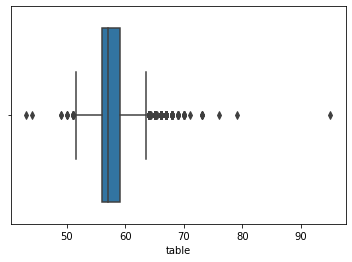

In [4]:
sns.boxplot(x=df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [6]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [9]:
aykiri_gozlemler = (df_table < alt_sinir) | (df_table > ust_sinir)

In [10]:
df_table[aykiri_gozlemler]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [12]:
df_table = pd.DataFrame(df_table)

In [15]:
clear_dataset = df_table[~ ((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]

In [17]:
clear_dataset
# Aykiri gözlemlerden temizlenmiş veri seti

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0
